<a href="https://colab.research.google.com/github/joaomalossi/Estudo-Estatistica-Descritiva-e-Correlacao/blob/master/Avalia%C3%A7%C3%A3o_a%C3%A7%C3%B5es_normalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
import pandas as pd

In [ ]:
inicio = '2000-01-01'
fim = '2024-01-24'

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0
2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0
2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0
2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0
2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0


In [ ]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

In [ ]:
ibov.head()

,IBOV
Date,
2000-01-03,16930.0
2000-01-04,15851.0
2000-01-05,16245.0
2000-01-06,16107.0
2000-01-07,16309.0


In [ ]:
ativos = ['MELI34','MGLU3', 'LREN3', 'CEAB3', 'GUAR3', 'AMAR3', 'SOMA3', 'ARZZ3']

In [ ]:
df = pd.DataFrame()

In [ ]:
for i in ativos:
	ticker = str(i) + '.SA'
	df[i] = yf.download(ticker, start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,MELI34,MGLU3,LREN3,CEAB3,GUAR3,AMAR3,SOMA3,ARZZ3
Date,,,,,,,,
2019-06-12,20.233334,6.175162,40.478291,NaN,13.858486,26.986727,NaN,44.209736
2019-06-13,20.233334,6.372468,40.790356,NaN,13.885431,29.410957,NaN,45.611176
2019-06-14,20.070000,6.432055,40.870598,NaN,13.750708,30.005581,NaN,45.223934
2019-06-17,20.070000,6.308321,41.236156,NaN,13.867467,30.828903,NaN,45.408333
2019-06-18,20.289165,6.326562,41.459045,NaN,13.966265,29.456697,NaN,45.177834


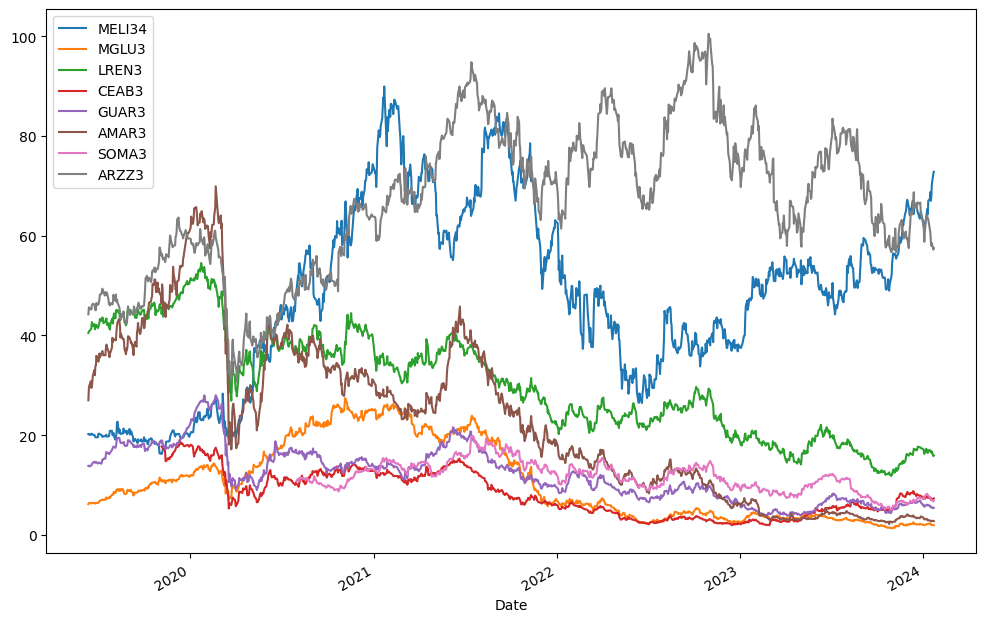

In [ ]:
df.plot(figsize = (12,8));

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
novo_df = pd.merge(ibov, df, how = 'inner', on = 'Date')

In [ ]:
novo_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
novo_normalizado.head()

,IBOV,MELI34,MGLU3,LREN3,CEAB3,GUAR3,AMAR3,SOMA3,ARZZ3
Date,,,,,,,,,
2019-06-12,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000
2019-06-13,1.004607,1.000000,1.031951,1.007709,NaN,1.001944,1.089830,NaN,1.031700
2019-06-14,0.997142,0.991927,1.041601,1.009692,NaN,0.992223,1.111864,NaN,1.022941
2019-06-17,0.992901,0.991927,1.021564,1.018723,NaN,1.000648,1.142373,NaN,1.027112
2019-06-18,1.011015,1.002759,1.024518,1.024229,NaN,1.007777,1.091525,NaN,1.021898


In [ ]:
novo_normalizado.tail()

,IBOV,MELI34,MGLU3,LREN3,CEAB3,GUAR3,AMAR3,SOMA3,ARZZ3
Date,,,,,,,,,
2024-01-17,1.307188,3.309390,0.348169,0.414543,NaN,0.411300,0.100790,NaN,1.335226
2024-01-18,1.294901,3.349423,0.323878,0.407379,NaN,0.396147,0.101531,NaN,1.311702
2024-01-19,1.298156,3.471993,0.328736,0.413061,NaN,0.400477,0.104866,NaN,1.323464
2024-01-22,1.287639,3.575288,0.315781,0.390580,NaN,0.386045,0.104496,NaN,1.293606
2024-01-23,1.304533,3.597529,0.314162,0.393050,NaN,0.391096,0.102272,NaN,1.300618


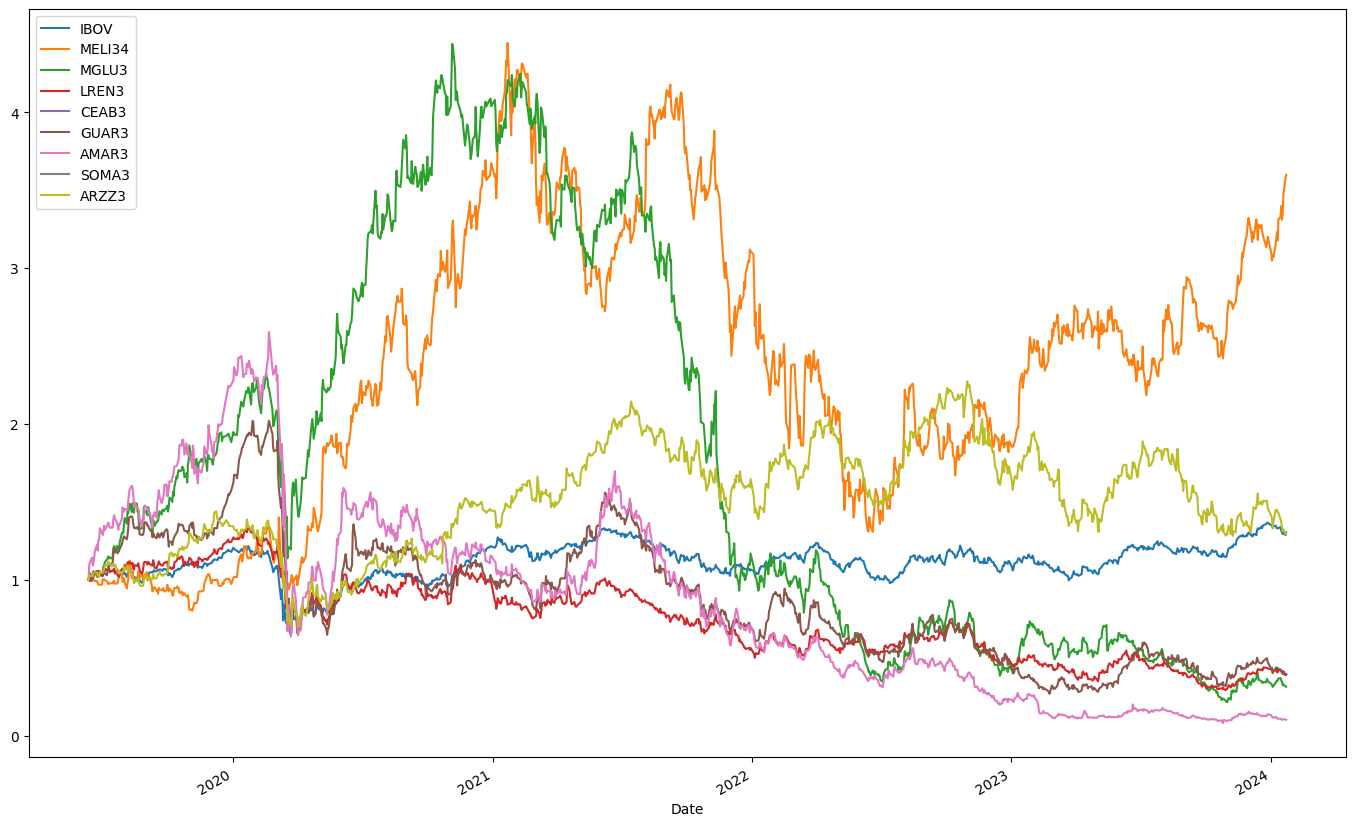

In [ ]:
novo_normalizado.plot(figsize = (17,11));